Author: Rodrigo MM Santiago @rodrigommsantiago

In [1]:
# Modules...
import numpy as np              # Numeric operations
import matplotlib.pyplot as plt # Plotting

# Plots inside the notebook
%matplotlib inline

_Vectors in the complex plane_

Defined by coordinates:

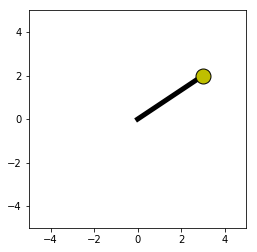

In [2]:
x = 3.      # real axis
y = 2.      # imaginary axis
z = x+1j*y  # complex vector

plt.axes(aspect='equal')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.plot([0,np.real(z)],[0,np.imag(z)],'k',linewidth=5)
plt.plot(np.real(z),np.imag(z),'k',marker='o',
         markerfacecolor='y',markersize=15);

defined by its magnitude and angle:

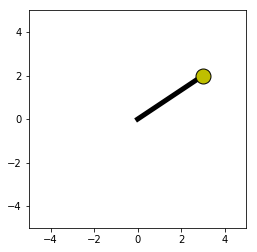

In [3]:
R = np.sqrt(x**2+y**2)  # magnitude
theta = np.arctan(y/x)  # angle
z2 = R*np.exp(1j*theta) # vector

plt.axes(aspect='equal')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.plot([0,np.real(z2)],[0,np.imag(z2)],'k',linewidth=5)
plt.plot(np.real(z2),np.imag(z2),'k',marker='o',
         markerfacecolor='y',markersize=15);

Girando o vetor:

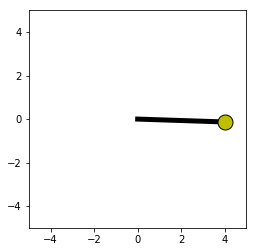

In [4]:
import pylab as pl          # animations
from IPython import display # visualization tools
from time import sleep      # pause function

for theta in np.arange(0,2*np.pi,0.05):
    R = 4
    z = R*np.exp(1j*theta)
    
    pl.clf() # clears the screen

    plt.axes(aspect='equal')
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.plot([0,np.real(z)],[0,np.imag(z)],'k',linewidth=5)
    plt.plot(np.real(z),np.imag(z),'k',marker='o',
             markerfacecolor='y',markersize=15);
    
    display.display(pl.gcf())       # shows plot inside animated display
    display.clear_output(wait=True) # holds display for the next plot

Girando o vetor em determinada frequência:

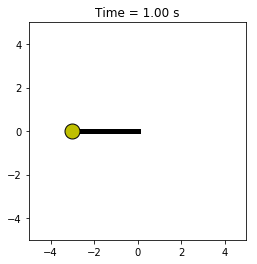

In [5]:
f = 3.5 # frequency (Hz)

for t in np.arange(0,1.001,0.01):
    
    omega = 2*np.pi*f         # angle (radians)
    R = 3                     # vector magnitude
    z = R*np.exp(-1j*omega*t) # complex vector
    
    pl.clf()
    plt.axes(aspect='equal')
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.plot([0,np.real(z)],[0,np.imag(z)],'k',linewidth=5)
    plt.plot(np.real(z),np.imag(z),'k',marker='o',
             markerfacecolor='y',markersize=15);
    plt.title('Time = '+"%.2f" % t+' s')
    display.display(pl.gcf())
    display.clear_output(wait=True)

Senoidal signal on a given frequency:

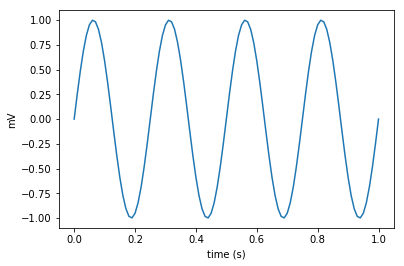

In [6]:
f = 4.                            # frequency (Hz)
tvector = np.arange(0,1.001,0.01) # time vector
LFP = np.sin(2*np.pi*f*tvector)   # senoidal signal
plt.plot(tvector,LFP)
plt.xlabel('time (s)')
plt.ylabel('mV');

Oscillatory power in a signal at a given frequency:

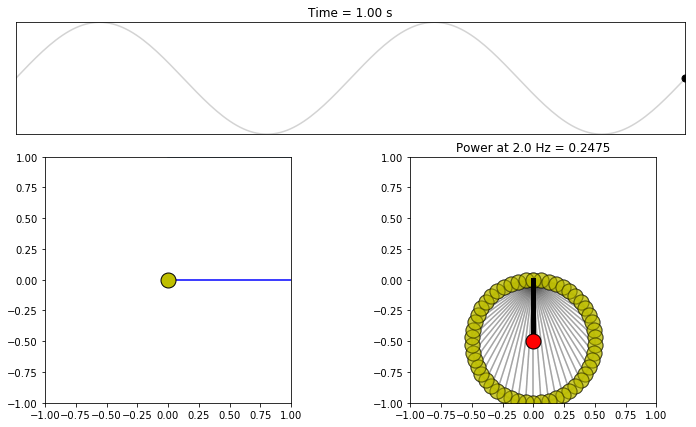

In [7]:
Tmax = 1.001 # max analyzed time (s)
f1 = 2.      # signal frequency (Hz)
f2 = 2.      # Fourier kernel frequency (Hz)

Zall = [] # stores all signal x kernel products through time

plt.figure(figsize=(12,7))
for t in np.arange(0,Tmax,0.005):
    
    LFP = np.sin(2*np.pi*f1*t)
    
    pl.clf()
    
    ax1 = plt.subplot2grid((3, 2), (0, 0),colspan=2)
    ax1.set_title('Time = '+"%.2f" % t+' s')
    ax1.set_xlim([0,Tmax])
    ax1.set_ylim([-1,1])
    ax1.plot(np.arange(0,Tmax,0.005),np.sin(2*np.pi*f1*np.arange(0,Tmax,0.005)),
             color='lightgray')
    ax1.plot(t,LFP,'k.',markersize=14)
    ax1.set_xticks([],[])
    ax1.set_yticks([],[])
    ax1.set_xlim([0,1])
    
    z = np.exp(-1j*2*np.pi*f2*t) # Fourier kernel
    Z = LFP*z                    # signal x kernel product
    Zall.append(Z)
    
    ax2 = plt.subplot2grid((3, 2), (1, 0),rowspan=2)
    ax2.axis('square')
    ax2.plot([0,np.real(z)],[0,np.imag(z)],'b-')
    ax2.plot([0,np.real(Z)],[0,np.imag(Z)],'k-')
    ax2.plot(np.exp(1j*(np.arange(0,2*np.pi,0.001))))
    ax2.plot(np.real(Z),np.imag(Z),'k',marker='o',
             markerfacecolor='y',markersize=15);
    ax2.set_xlim([-1,1])
    ax2.set_ylim([-1,1])
    
    display.display(pl.gcf())
    display.clear_output(wait=True)


Zmean = np.mean(Zall)
ax3 = plt.subplot2grid((3, 2), (1, 1),rowspan=2)
ax3.axis('square')
ax3.plot([np.zeros(len(Zall)),np.real(Zall)],[np.zeros(len(Zall)),np.imag(Zall)],
         'k-',alpha=0.1)
ax3.plot(np.real(Zall),np.imag(Zall),'k',marker='o',
         markerfacecolor='y',markersize=15,alpha=0.3);
ax3.plot([0,np.real(Zmean)],[0,np.imag(Zmean)],'k-',linewidth=5)
ax3.plot(np.real(Zmean),np.imag(Zmean),'k',marker='o',
         markerfacecolor='r',markersize=15);

Power = abs(Zmean)**2;
    
ax3.set_title('Power at '+str(f2)+' Hz = '+"%.4f" % Power)
ax3.set_xlim([-1,1])
ax3.set_ylim([-1,1]);

Power spectrum:

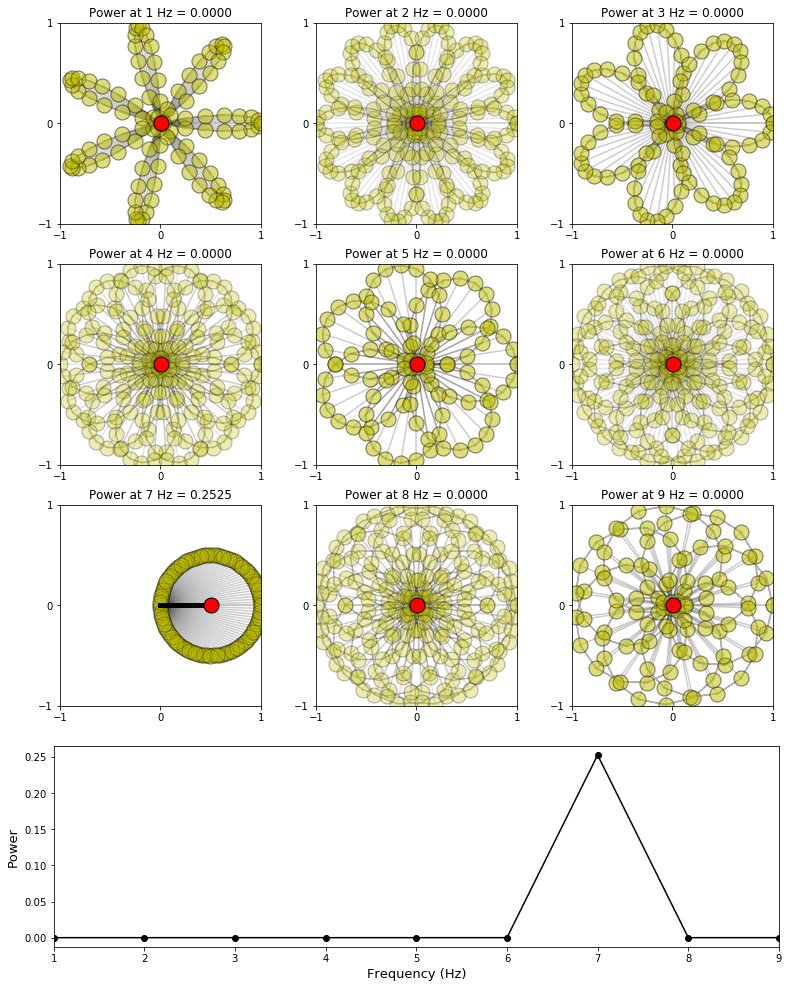

In [8]:
Tmax = 1.001 # max analyzed time (s)
f1 = 7.     # signal frequency (Hz)


# Fourier kernel frequencies (Hz)
FreqVector = range(1,10)
# Power spectrum
PowerSpectrum = np.empty(len(FreqVector))

plt.figure(figsize=(13,17))
for f2 in FreqVector: # varying kernel frequency
    Zall = []
    
    for t in np.arange(0,Tmax,0.005):
        
        LFP = (np.sin(2*np.pi*f1*t+np.pi/2))
        z = np.exp(-1j*2*np.pi*f2*t) # fourier kernel
        Z = LFP*z                    # signal x kernel product
        Zall.append(Z)

    Zmean = np.mean(Zall)
    
    ax = plt.subplot(430+f2)
    ax.axis('square')
    ax.plot([np.zeros(len(Zall)),np.real(Zall)],[np.zeros(len(Zall)),np.imag(Zall)],
            'k-',alpha=0.1)
    ax.plot(np.real(Zall),np.imag(Zall),'k',marker='o',
            markerfacecolor='y',markersize=15,alpha=0.3);
    ax.plot([0,np.real(Zmean)],[0,np.imag(Zmean)],'k-',linewidth=5)
    ax.plot(np.real(Zmean),np.imag(Zmean),'k',marker='o',
            markerfacecolor='r',markersize=15);

    Power = abs(Zmean)**2
    PowerSpectrum[f2-1] = Power

    ax.set_title('Power at '+str(f2)+' Hz = '+"%.4f" % Power)
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1]);
    
# PSD (Power Spectrum Density)
ax = plt.subplot2grid((4, 3), (3, 0),colspan=3)
ax.plot(FreqVector,PowerSpectrum,'ko-')
ax.set_xlabel('Frequency (Hz)',size=13)
ax.set_ylabel('Power',size=13)
ax.set_xlim([1,9]);